## From Previous Labs

* Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

* Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
# apply operations from the previous lab
customer_df.columns = [i.lower().replace(' ', '_') for i in customer_df.columns]
customer_df = customer_df.rename(columns = {'employmentstatus' : 'employment_status'})
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['income'] = customer_df['income'].replace(0, round(np.mean(customer_df['income'])))
customer_df.set_index('customer', inplace = True)
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,37657,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,37657,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
def split_to_types(x):
    continuous = []
    discrete = []
    categorical = []
    for col in x:
        if x[col].dtype == np.object:
            categorical.append(col)
        else:
            if x[col].nunique() > 250:
                continuous.append(col)
            else:
                discrete.append(col)
    return x[continuous], x[discrete], x[categorical]

In [5]:
continuous_df, discrete_df, categorical = split_to_types(customer_df)

* Plot a correlation matrix, what can you see?

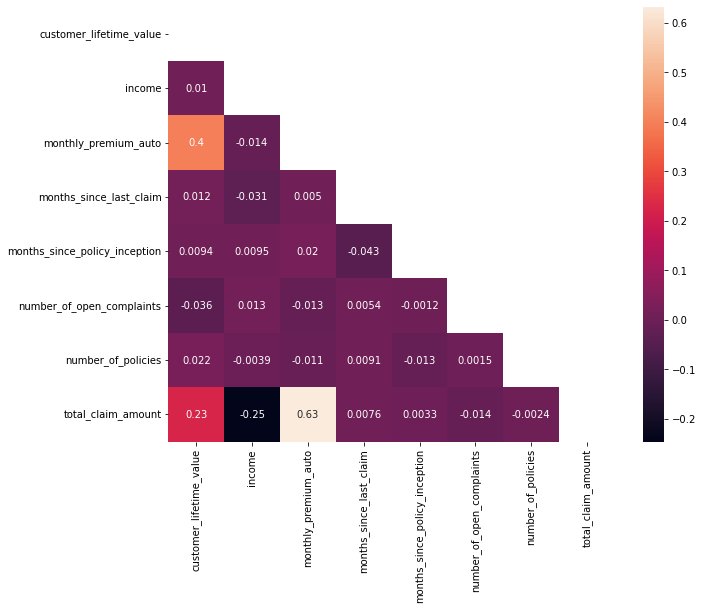

In [6]:
corr_matrix = customer_df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.show()
# there is relatively high correlation between monthly_premium_auto and 
# total_claim_amount (also with customer_lifetime_value)

* Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).
* What can you see in the plots?

In [7]:
# don't need effective_to_date column for plot
discrete_df.drop('effective_to_date', axis = 1, inplace = True)

MONTHLY_PREMIUM_AUTO:


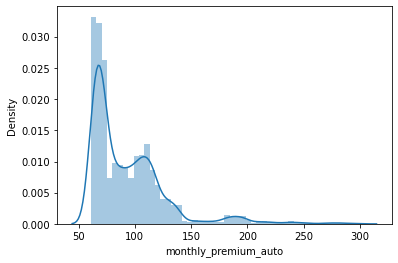

MONTHS_SINCE_LAST_CLAIM:


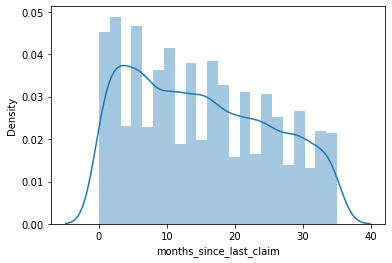

MONTHS_SINCE_POLICY_INCEPTION:


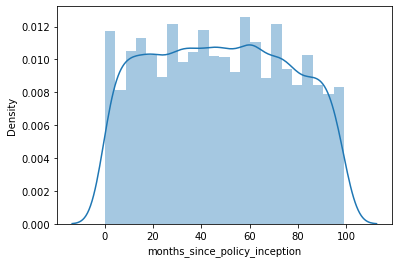

NUMBER_OF_OPEN_COMPLAINTS:


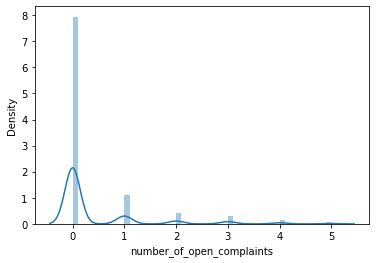

NUMBER_OF_POLICIES:


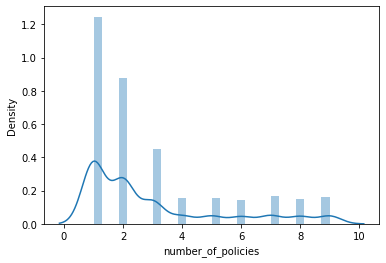

In [8]:
def plot(x):
    for col in x:
        print(f'{col.upper()}:')
        sns.distplot(x[col])
        plt.show()
plot(discrete_df)
# are not normally distributed

CUSTOMER_LIFETIME_VALUE:


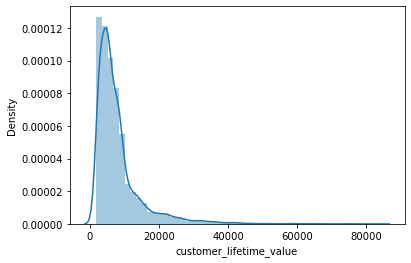

INCOME:


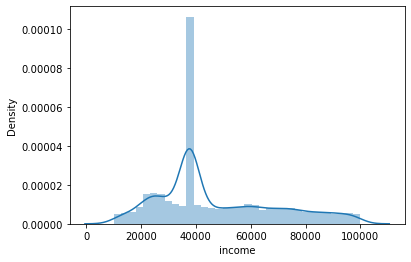

TOTAL_CLAIM_AMOUNT:


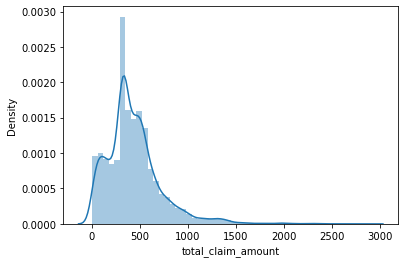

In [9]:
plot(continuous_df)
# are not normal and have outliers

* Open the categoricals variable we created before.

In [10]:
categorical.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


* Plot all the categorical variables with the proper plot. What can you see?
* There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

The categorical columns are:  ['state', 'response', 'coverage', 'education', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']

Frequency analysis of column: STATE


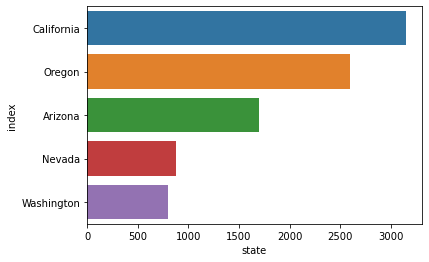

Frequency analysis of column: RESPONSE


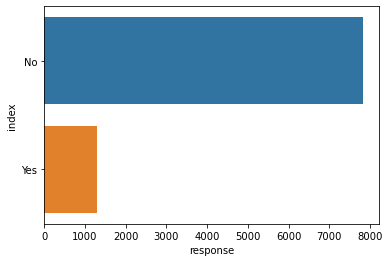

Frequency analysis of column: COVERAGE


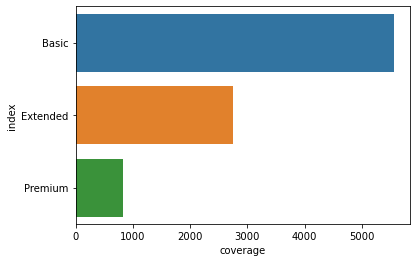

Frequency analysis of column: EDUCATION


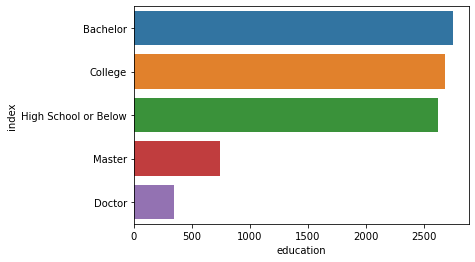

Frequency analysis of column: EMPLOYMENT_STATUS


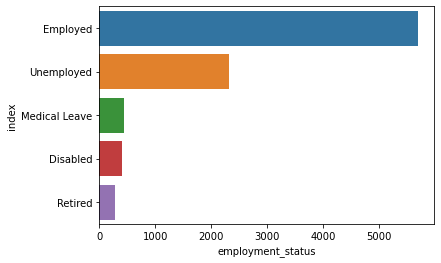

Frequency analysis of column: GENDER


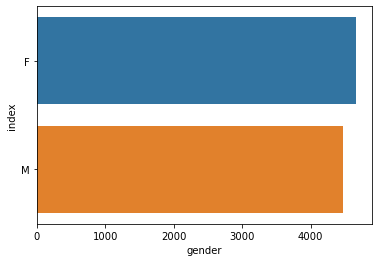

Frequency analysis of column: LOCATION_CODE


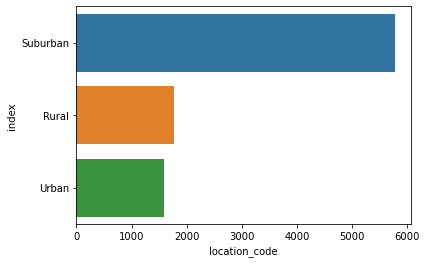

Frequency analysis of column: MARITAL_STATUS


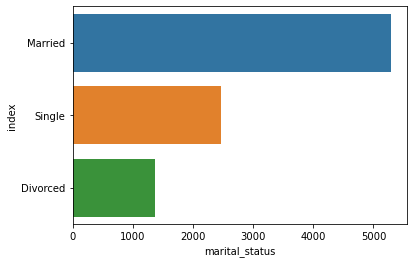

Frequency analysis of column: POLICY_TYPE


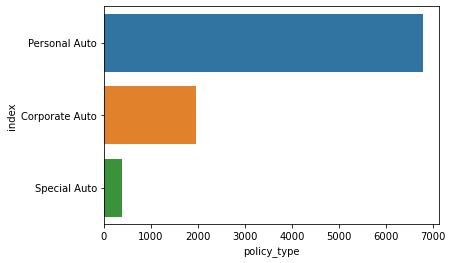

Frequency analysis of column: POLICY


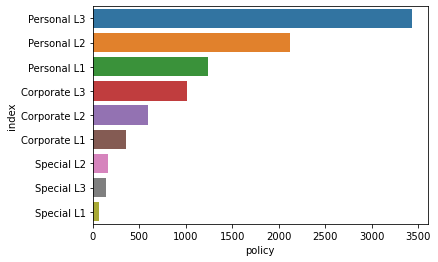

Frequency analysis of column: RENEW_OFFER_TYPE


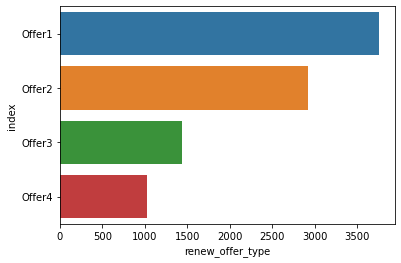

Frequency analysis of column: SALES_CHANNEL


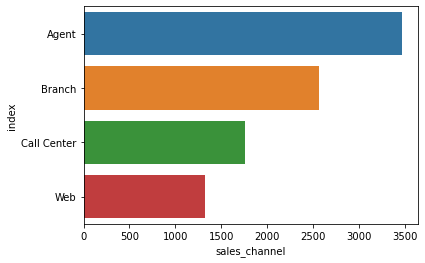

Frequency analysis of column: VEHICLE_CLASS


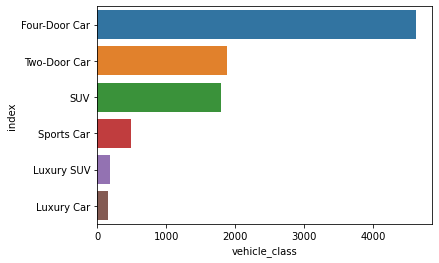

Frequency analysis of column: VEHICLE_SIZE


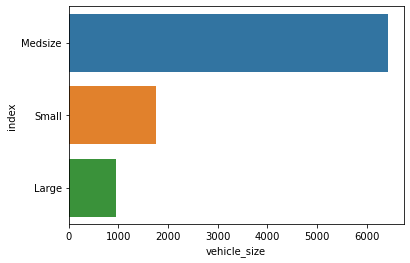

In [11]:
columns = list(categorical.columns)
print("The categorical columns are: ",columns)
print()
for col in columns:
    cat_plot = categorical[col].value_counts().reset_index()
    sns.barplot(x=col, y="index", data = cat_plot)
    print("Frequency analysis of column:",col.upper())
    plt.show()
#from the plots we see that all values are unique and there are no empty or NaN values

In [12]:
#let's check the values of policy_type and policy with crosstab and make sure the namings match
pd.crosstab(categorical.policy_type, categorical.policy)

policy,Corporate L1,Corporate L2,Corporate L3,Personal L1,Personal L2,Personal L3,Special L1,Special L2,Special L3
policy_type,,,,,,,,,
Corporate Auto,359,595,1014,0,0,0,0,0,0
Personal Auto,0,0,0,1240,2122,3426,0,0,0
Special Auto,0,0,0,0,0,0,66,164,148


In [13]:
#as they match, I decided to leave the one with extra information (L1, L2, L3) and drop the policy_type column
categorical.drop('policy_type', axis = 1, inplace = True)

* Plot time variable. Can you extract something from it?

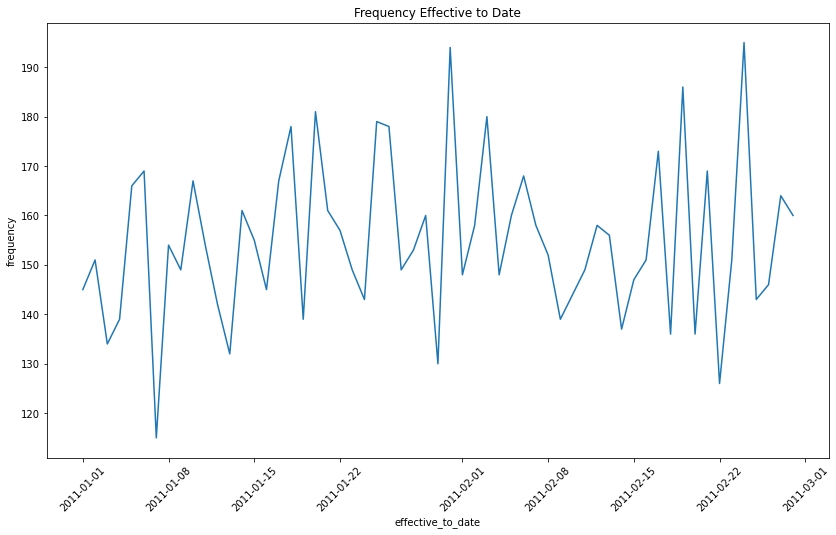

In [14]:
fig, ax = plt.subplots(figsize=(14, 8))
sns.lineplot(x = customer_df['effective_to_date'].unique(), y = customer_df['effective_to_date'].value_counts())
ax.set_title('Frequency Effective to Date')
ax.set_xlabel('effective_to_date')
ax.set_ylabel('frequency')
plt.xticks(rotation = 45)
plt.show()

In [15]:
#as they belong to one year, I decided to group them by week of the year
customer_df['effective_to_week'] = customer_df['effective_to_date'].dt.weekofyear
customer_df['effective_to_week'].unique()

array([ 8,  5,  7,  3,  4,  1,  2,  9,  6, 52])

In [16]:
#correct the week from the previous year (change 52 to 1)
customer_df['effective_to_week'] = np.where(customer_df['effective_to_week'] == 52, 1, customer_df['effective_to_week'])
customer_df['effective_to_week'].unique()

array([8, 5, 7, 3, 4, 1, 2, 9, 6])

In [17]:
#drop effective_to_date
customer_df.drop('effective_to_date', axis = 1, inplace = True)

In [18]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_to_week
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,8
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,37657,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,5
AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,7
WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,37657,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,3
HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,5


* We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [19]:
numerical = customer_df.select_dtypes(np.number)
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'effective_to_week'],
      dtype='object')

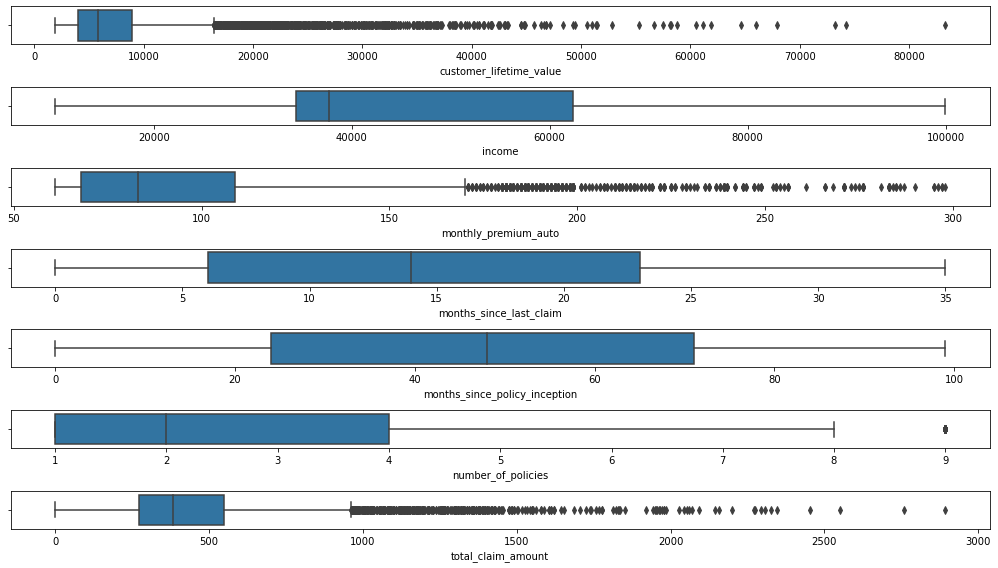

In [20]:
fig, ax = plt.subplots(7,1, figsize = (14,8))
sns.boxplot(numerical['customer_lifetime_value'], ax = ax[0])
sns.boxplot(numerical['income'], ax = ax[1])
sns.boxplot(numerical['monthly_premium_auto'], ax = ax[2])
sns.boxplot(numerical['months_since_last_claim'], ax = ax[3])
sns.boxplot(numerical['months_since_policy_inception'], ax = ax[4])
sns.boxplot(numerical['number_of_policies'], ax = ax[5])
sns.boxplot(numerical['total_claim_amount'], ax = ax[6])
plt.tight_layout()

In [21]:
#as removing outliers leads to visible data loss, I decided to apply logarithmic transformation
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [22]:
#as total_claim_amount will be our target, it is recommended to leave it as it is
#monthly_premium auto has outliers, which are not significant
#remove outliers only from customer_lifetime_value
numerical['customer_lifetime_value'] = list(map(log_transform, numerical['customer_lifetime_value']))
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_week
customer,,,,,,,,,
BU79786,7.924260,56274,69,32,5,0,1,384.811147,8
QZ44356,8.850738,37657,94,13,42,0,8,1131.464935,5
AI49188,9.464008,48767,108,18,38,0,2,566.472247,7
WW63253,8.941920,37657,106,18,65,0,7,529.881344,3
HB64268,7.942253,43836,73,12,44,0,1,138.130879,5


In [23]:
#check if NaN appeared
numerical.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
effective_to_week                0
dtype: int64

* Create a copy of the dataframe for the data wrangling.

In [24]:
#first concatenate all changed and transformed data to dataframe
customer_df = pd.concat([numerical, categorical], axis=1)
#make a copy
customer_df2 = customer_df.copy()
customer_df2.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,effective_to_week,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,
BU79786,7.924260,56274,69,32,5,0,1,384.811147,8,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,8.850738,37657,94,13,42,0,8,1131.464935,5,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,9.464008,48767,108,18,38,0,2,566.472247,7,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,8.941920,37657,106,18,65,0,7,529.881344,3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,7.942253,43836,73,12,44,0,1,138.130879,5,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


* Normalize the continuous variables. You can use any one method you want.

In [25]:
# apply the split function on new data
continuous_df, discrete_df, categorical = split_to_types(customer_df2)
continuous_df.drop('total_claim_amount', axis = 1, inplace = True)  #drop the target

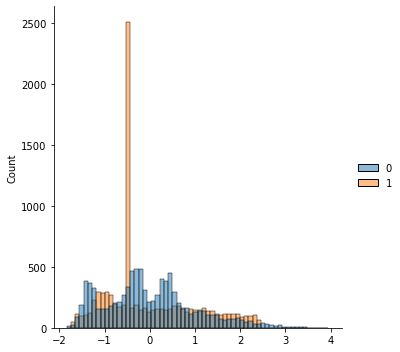

In [26]:
#standardize continuous variables
transformer = StandardScaler().fit(continuous_df)
continuous_df = transformer.transform(continuous_df)
#check
sns.displot(continuous_df)

* Encode the categorical variables

* You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

In [27]:
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

#data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.

In [28]:
categorical.columns

Index(['state', 'response', 'coverage', 'education', 'employment_status',
       'gender', 'location_code', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [29]:
#apply dummies (instead of one hot encoder) on selected columns
dummies_df = categorical[['state', 'response', 'gender', 'marital_status', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class']]
dummies_df = pd.get_dummies(dummies_df , drop_first = True)
dummies_df.head()

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,marital_status_Married,marital_status_Single,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
AI49188,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
WW63253,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
HB64268,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
#apply ordinal encoder on others
ordinal_df = categorical[['coverage', 'education', 'employment_status', 'location_code', 'vehicle_size']]
ordinal_df["coverage"] = ordinal_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal_df["education"] = ordinal_df["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master" : 3, "Doctor" : 4})
ordinal_df["employment_status"] = ordinal_df["employment_status"].map({"Retired" : 0, "Disabled" : 1, "Unemployed" : 2, "Medical Leave" : 3, "Employed" : 4})
ordinal_df["location_code"] = ordinal_df["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
ordinal_df["vehicle_size"] = ordinal_df["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
ordinal_df.head()

,coverage,education,employment_status,location_code,vehicle_size
customer,,,,,
BU79786,0,2,4,1,1
QZ44356,1,2,2,1,1
AI49188,2,2,4,1,1
WW63253,0,2,2,1,1
HB64268,0,2,4,0,1


* The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [31]:
#already converted to week of the year in previous lab (effective_to_week)

* Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [32]:
#it's time to separate target from the features
y = customer_df2['total_claim_amount']
X = np.concatenate((continuous_df, discrete_df, dummies_df, ordinal_df), axis = 1)

In [33]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-1.262556,0.417274,69.0,32.0,5.0,0.0,1.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,4.0,1.0,1.0
1,0.156500,-0.439761,94.0,13.0,42.0,0.0,8.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0
2,1.095826,0.071689,108.0,18.0,38.0,0.0,2.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,4.0,1.0,1.0
3,0.296160,-0.439761,106.0,18.0,65.0,0.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0
4,-1.234997,-0.155311,73.0,12.0,44.0,0.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.009832,1.138506,73.0,18.0,89.0,0.0,2.0,6.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,1.0
9130,-1.088297,-1.178763,79.0,14.0,28.0,0.0,1.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1.0,1.0
9131,0.396571,-0.439761,85.0,9.0,37.0,3.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1.0
9132,0.271642,-1.163249,96.0,34.0,3.0,0.0,3.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1.0,2.0


## Lab | Comparing regression models 

* In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

* Try a simple linear regression with all the data to see whether we are getting good results.

In [35]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
y_test_predict = lm.predict(X_test)
score_lm = model.score(X_test, y_test)
score_lm

0.60064862670224

In [36]:
#let's visualize the model to see if it is linear
#define residuals
y_train_predict = lm.predict(X_train)
residual_test = y_test-y_test_predict
residual_train = y_train-y_train_predict

(0.0, 3000.0)

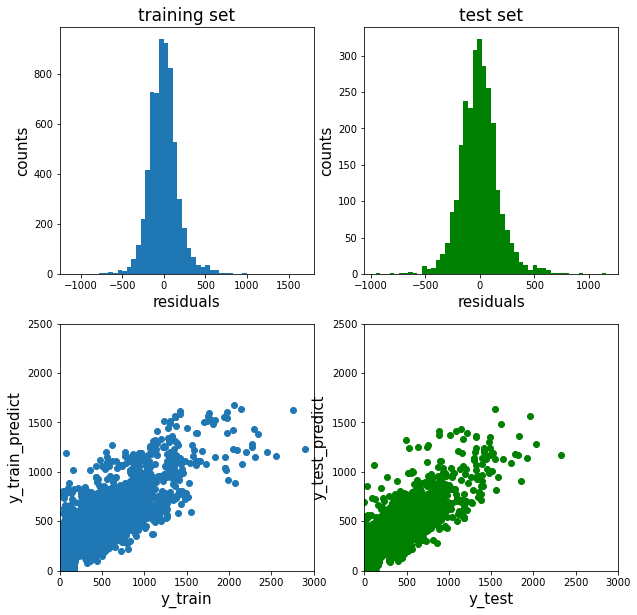

In [37]:
#visualize in test and training set
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

ax[0,0].set_title('training set', fontsize = 17)
ax[0,1].set_title('test set', fontsize = 17)

ax[0,0].set_xlabel('residuals', fontsize = 15)
ax[0,0].set_ylabel('counts', fontsize = 15)
ax[0,1].set_xlabel('residuals', fontsize = 15)
ax[0,1].set_ylabel('counts', fontsize = 15)
ax[1,0].set_xlabel('y_train', fontsize = 15)
ax[1,0].set_ylabel('y_train_predict', fontsize = 15)
ax[1,1].set_xlabel('y_test', fontsize = 15)
ax[1,1].set_ylabel('y_test_predict', fontsize = 15)

ax[0,0].hist(residual_train, bins = 50)
ax[0,1].hist(residual_test, bins = 50, color = 'green')

ax[1,0].scatter(x = y_train, y = y_train_predict)
ax[1,1].scatter(x = y_test, y = y_test_predict, color = 'green')

ax[1,0].set_ylim(0, 2500)
ax[1,1].set_ylim(0, 2500)
ax[1,0].set_xlim(0, 3000)
ax[1,1].set_xlim(0, 3000)

* Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [38]:
def apply_model(regressor):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
    model = regressor.fit(X_train, y_train)
    y_test_predict = regressor.predict(X_test)
    score = model.score(X_test, y_test)
    RMSE = mean_squared_error(y_test, y_test_predict, squared = False)  #to calculate square root of mse
    MAE = mean_absolute_error(y_test, y_test_predict)
    print(regressor)
    print("-----------------")
    print("R2:", round(score, 2))
    print("RMSE:", round(RMSE, 2))
    print("MAE:", round(MAE, 2))
    print("-----------------")

* Use the function to check LinearRegressor and KNeighborsRegressor.
* You can check also the MLPRegressor for this task!
* Check and discuss the results.

In [39]:
#find the optimal k for KNN Regressor
scores = []
for k in range(2,15):
    knn = KNeighborsRegressor(n_neighbors = k)
    model = knn.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

Text(0, 0.5, 'Accuracy')

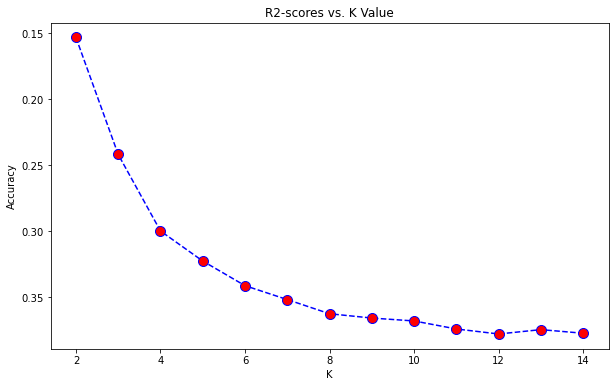

In [40]:
#plot the scores 
plt.figure(figsize=(10,6))
plt.plot(range(2,15), scores, color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.gca().invert_yaxis()
plt.title('R2-scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
#it seems that k = 8 is most suitable in this case (the last one before the line changes direction)

In [45]:
#apply the function to regressors and evaluate the scores
apply_model(LinearRegression())
apply_model(KNeighborsRegressor(n_neighbors = 8, weights = 'distance'))  #with distance weights shows better results
apply_model(MLPRegressor())

LinearRegression()
-----------------
R2: 0.6
RMSE: 178.55
MAE: 131.92
-----------------
KNeighborsRegressor(n_neighbors=8, weights='distance')
-----------------
R2: 0.38
RMSE: 222.7
MAE: 153.04
-----------------
MLPRegressor()
-----------------
R2: 0.7
RMSE: 154.01
MAE: 109.12
-----------------


The results for Linear Regression model are not bad, taking into concideration the scores and visualization of train and test set.

The MLP Regressor shows best results and can be applied to predict the target value.

And finally, the highest score reached, after setting the parameters, in KNN Regressor is 0.38, which shouldn't be used for prediction.